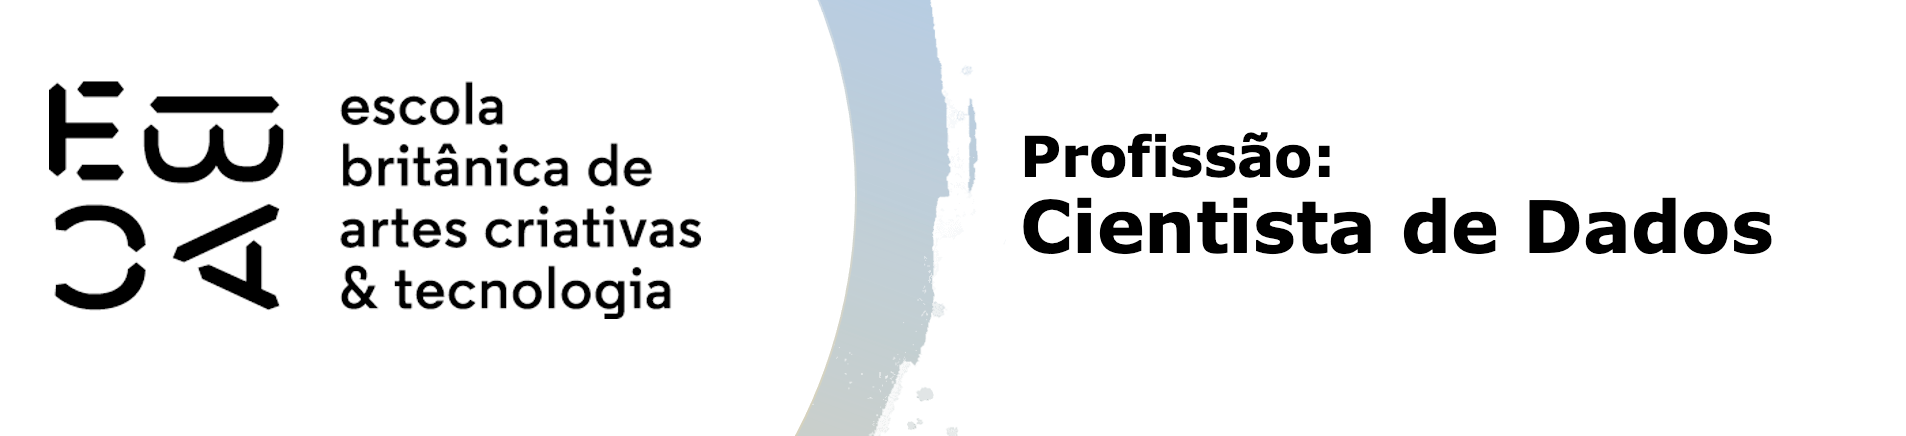

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from tqdm.notebook import tqdm

In [14]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
#Revenue: Indica se houve compra ou não
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [114]:
# informações sobre o df 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [115]:
# verificar se há missings

df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [116]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


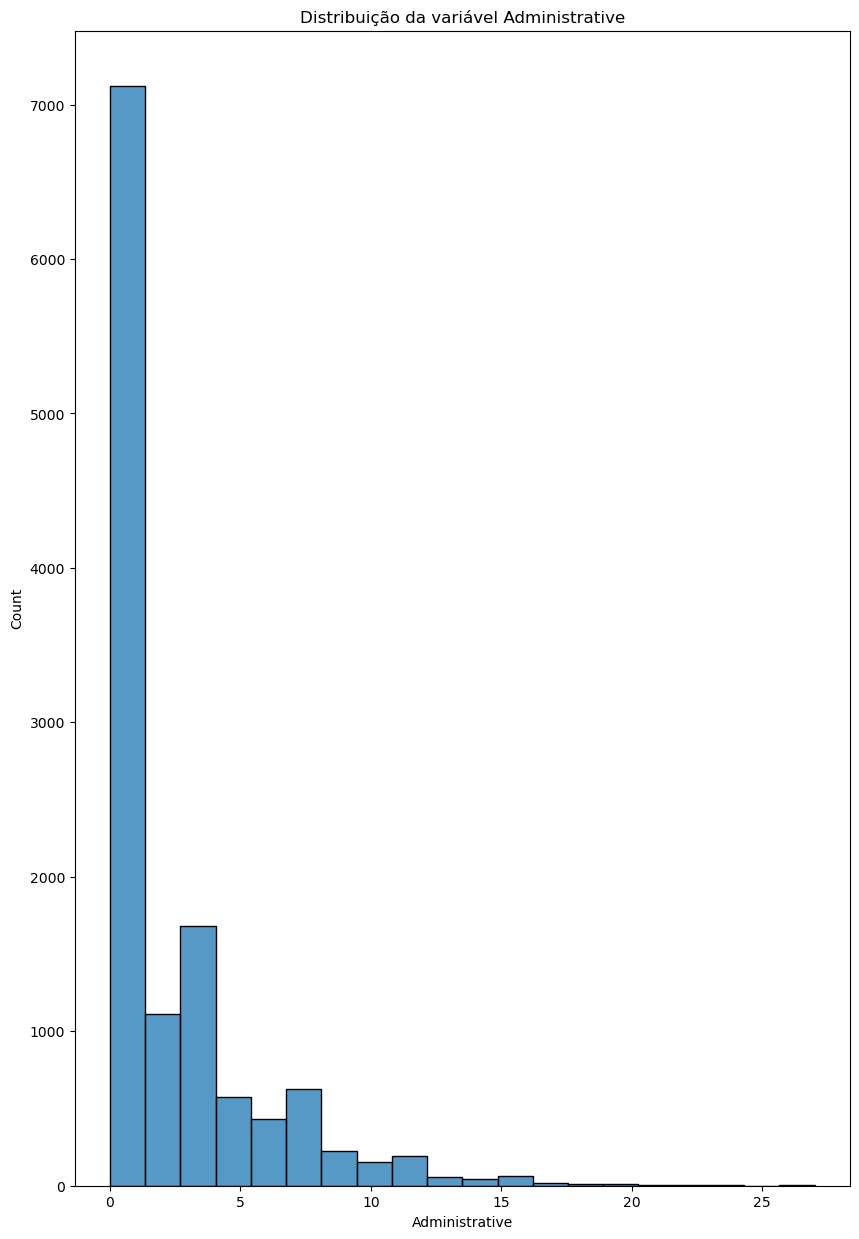

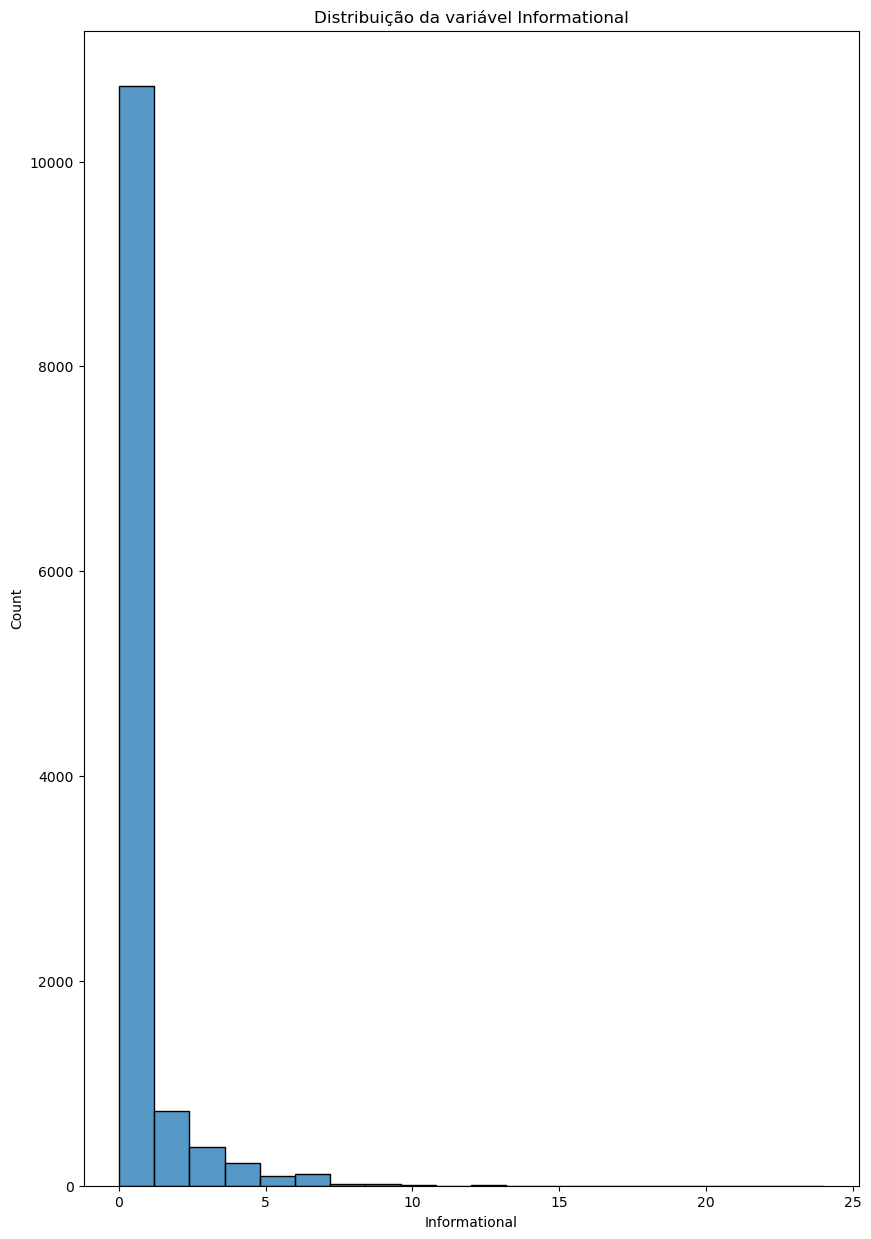

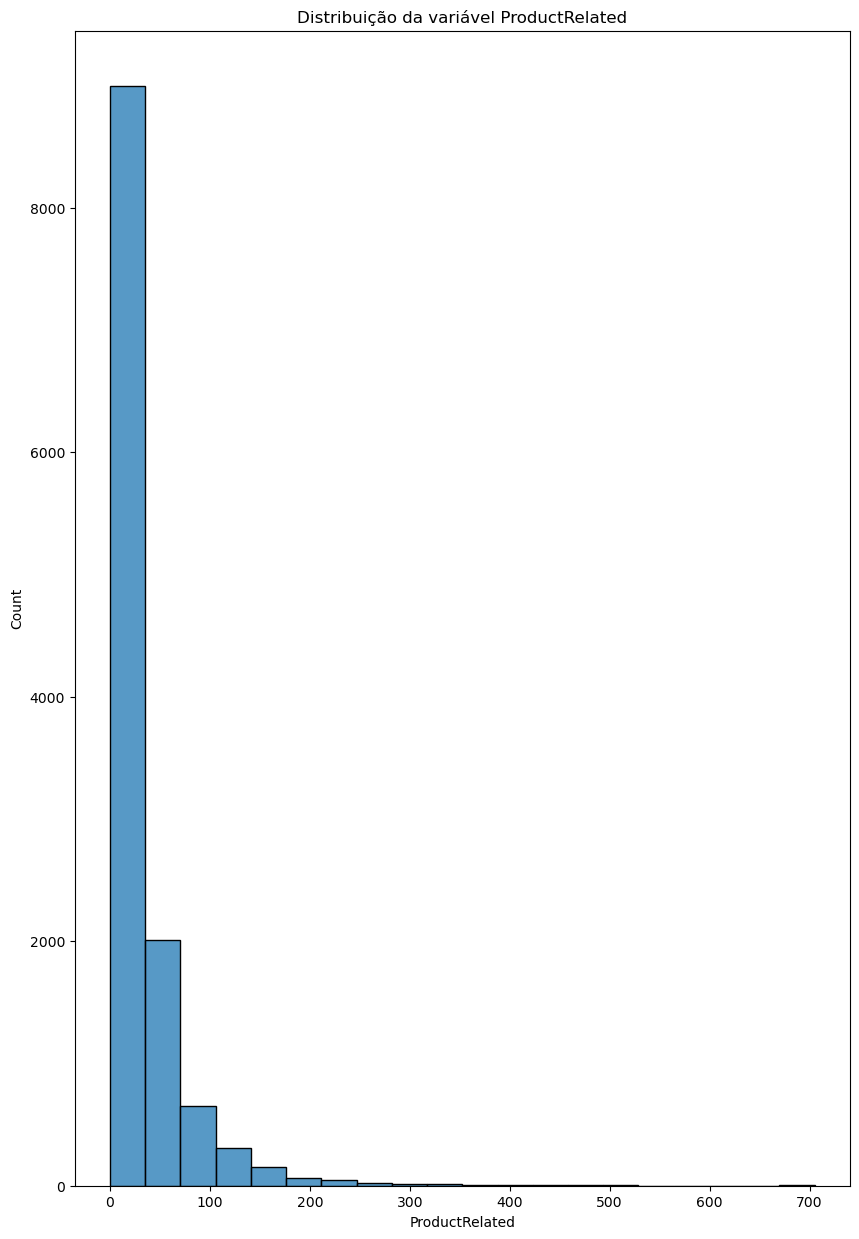

In [119]:
# Criar histogramas para visualizar a distribuição das variáveis relacionadas à quantidade de acesso

columns_qtd = ['Administrative', 
               'Informational', 
               'ProductRelated']

for col in columns_qtd:
    fig = plt.figure(figsize=(10,15))
    fig = sns.histplot(data=df, x=col, bins=20).set_title(f'Distribuição da variável {col}')
    plt.show()

> É possível observar que as páginas relacionadas a produtos apresentam maior quantidade de acessos. 

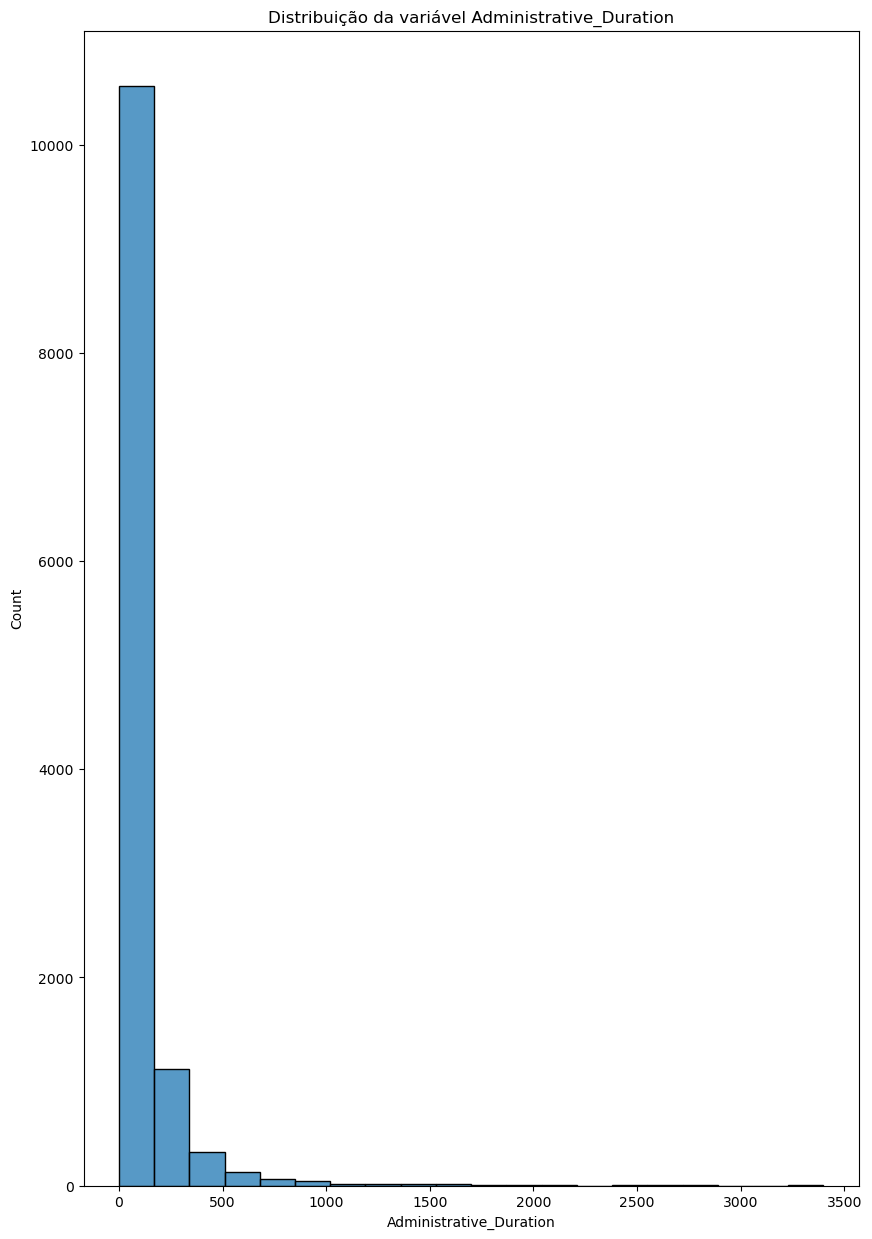

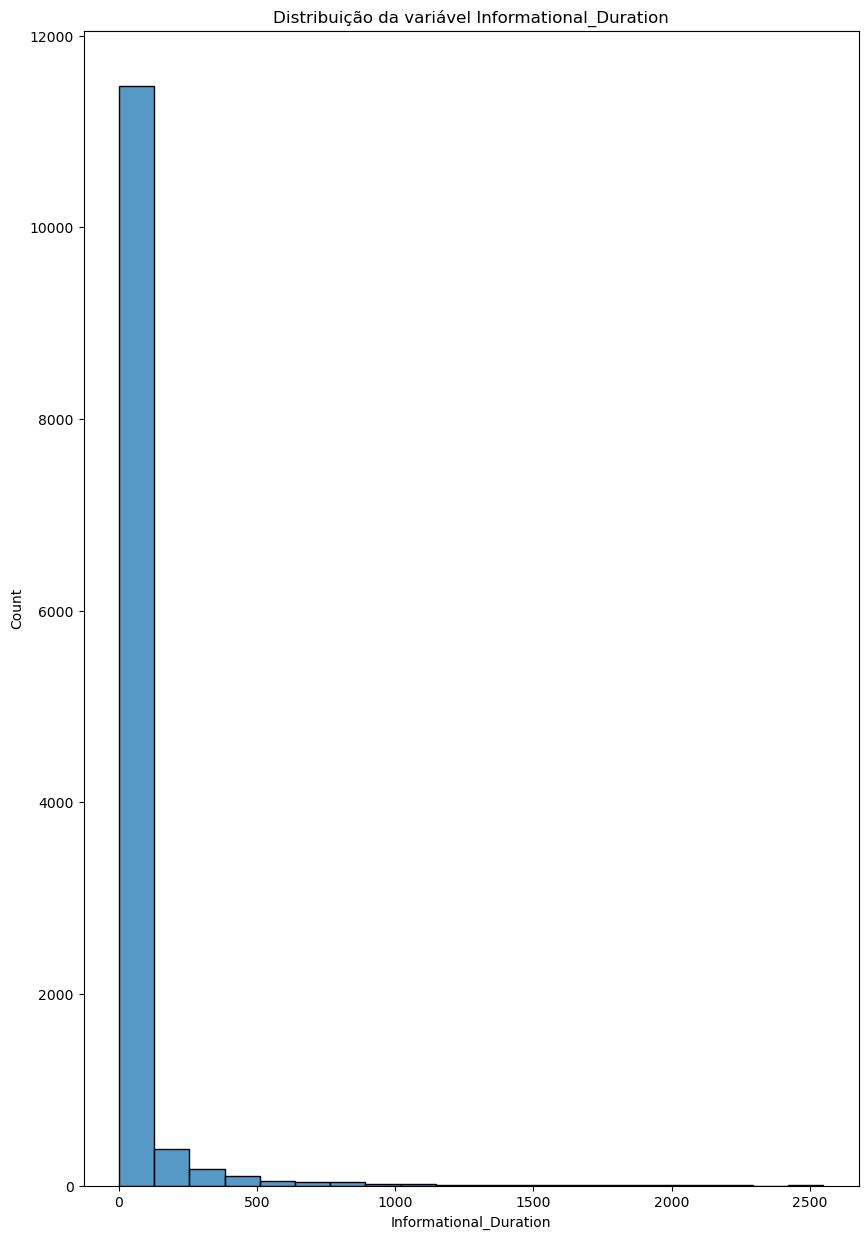

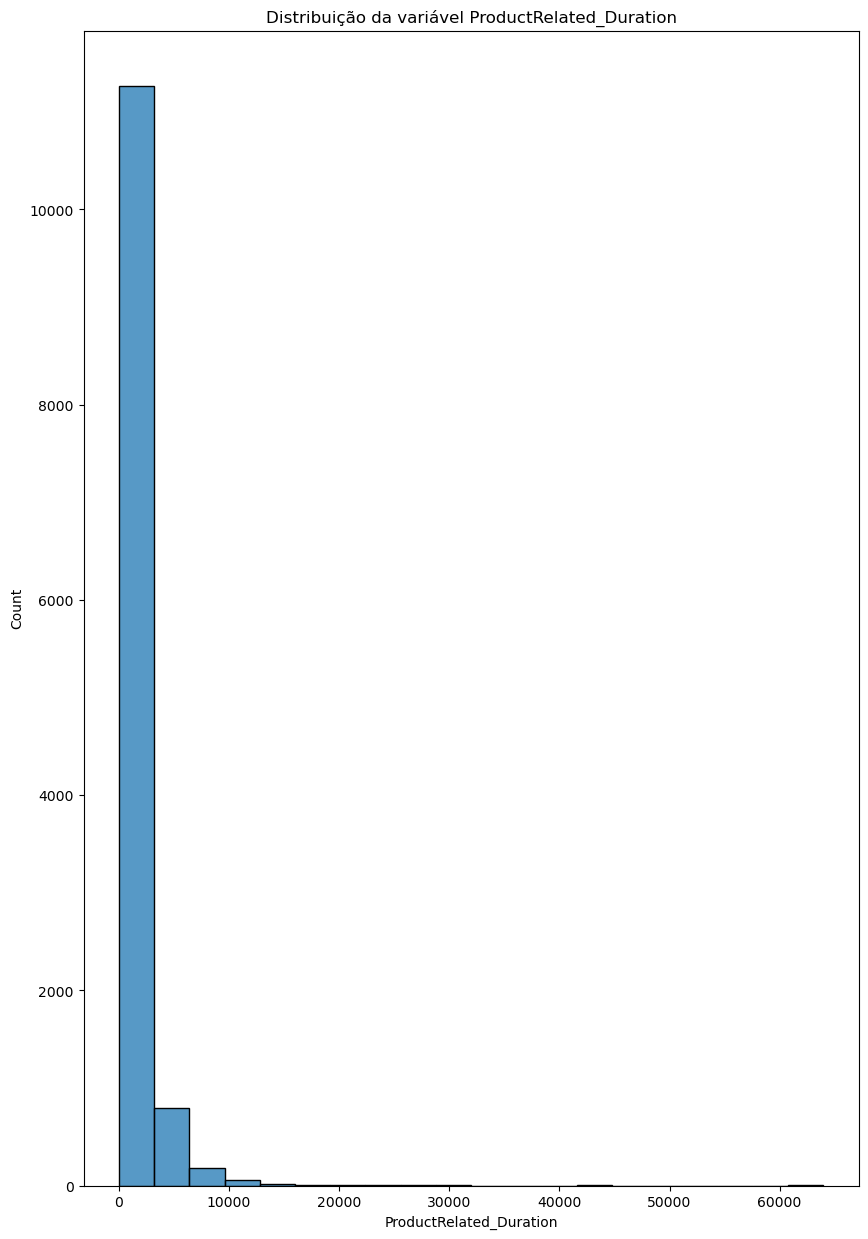

In [120]:
# Criar histogramas para visualizar a distribuição das variáveis relacionadas ao tempo de acesso

columns_tempo = ['Administrative_Duration', 
                 'Informational_Duration', 
                 'ProductRelated_Duration']

for col in columns_tempo:
    fig = plt.figure(figsize=(10,15))
    fig = sns.histplot(data=df, x=col, bins=20).set_title(f'Distribuição da variável {col}')
    plt.show()

> Assim como a quantidade de acesso, as páginas relacionadas a produtos também apresentam maior duração do acesso.

In [121]:
#lista com colunas do escopo
cols = ['Administrative', 
        'Administrative_Duration', 
        'Informational', 
        'Informational_Duration', 
        'ProductRelated', 
        'ProductRelated_Duration']

/Users/rayssaathayde/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


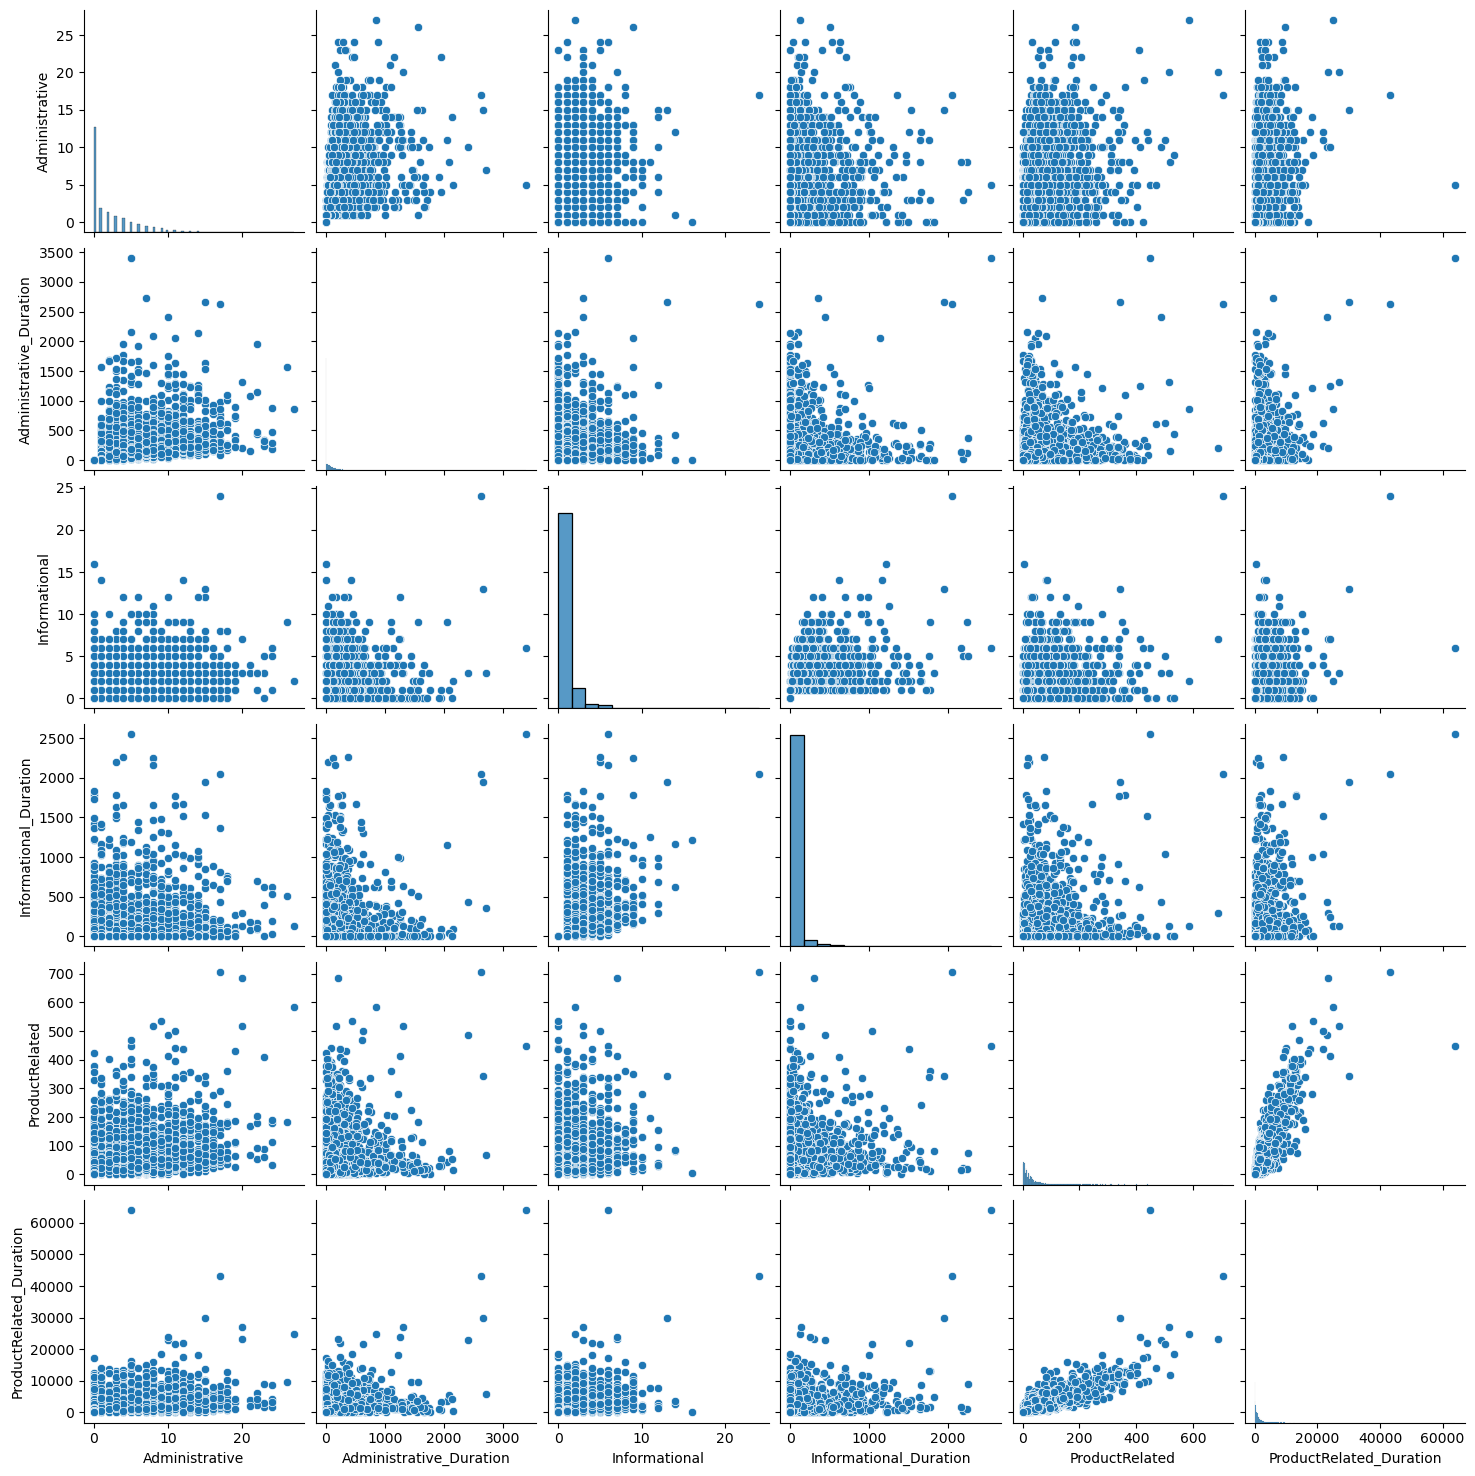

In [122]:
# Criar pairplot para visualizar a relação entre as seis primeiras variáveis

sns.pairplot(data = df[cols])
plt.show()

> Não parece haver agrupamentos (clusters) relevantes de clientes na amostra. Um motivo pode ser a não padronização dos dados, que pode distorcer o resultado, uma vez que a escala de distância entre os pontos não é a mesma.

In [123]:
# Criar um novo df
df_pad = df.copy()

#Aplica a padronização nas colunas numéricas do DataFrame df_pad, substituindo os valores das colunas padronizadas.
# As colunas são padronizadas usando a classe StandardScaler do scikit-learn.
# A classe StandardScaler centraliza os dados para ter média zero e escalona-os para ter desvio padrão igual a um.
df_pad[cols] = pd.DataFrame(data=StandardScaler().fit_transform(df_pad[cols]), 
                                         columns=df_pad[cols].columns)


df_pad.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


/Users/rayssaathayde/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


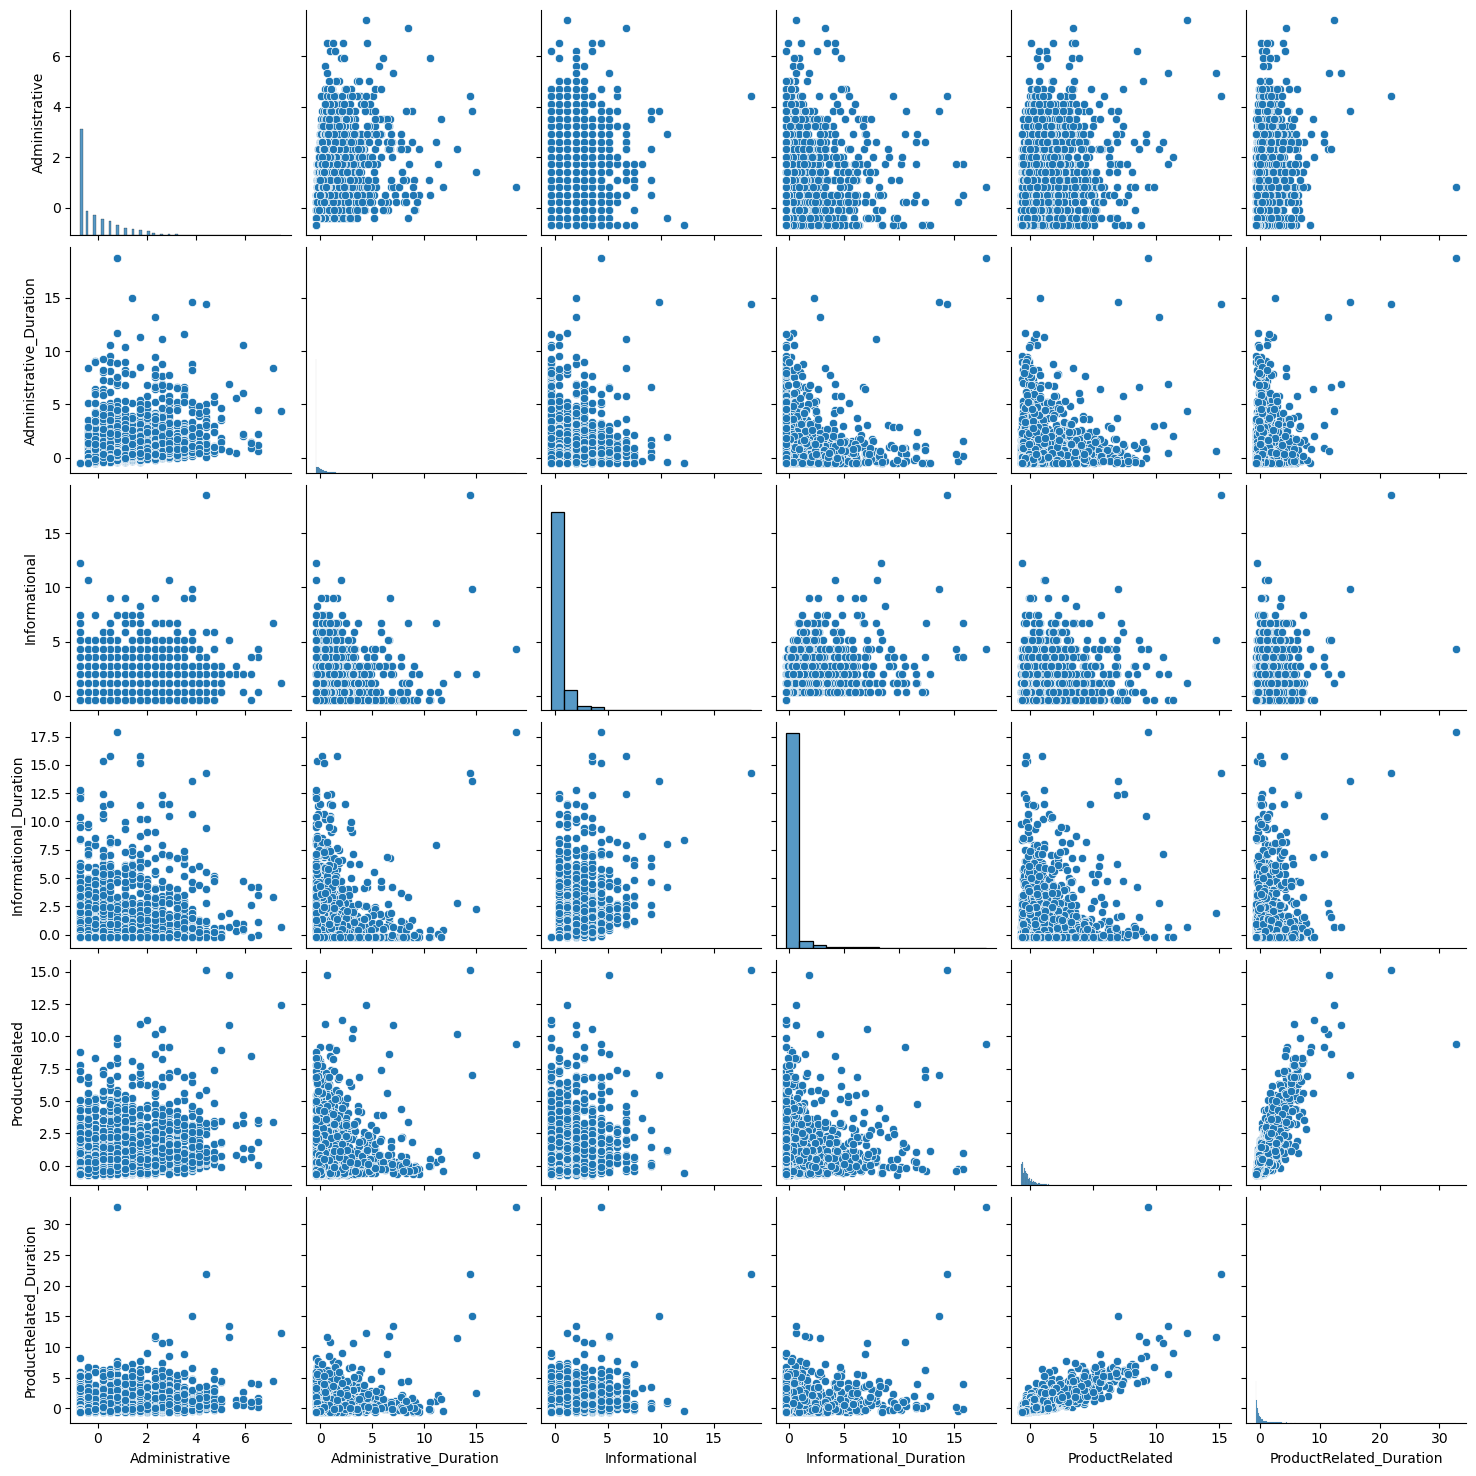

In [88]:
sns.pairplot(data = df_pad[cols])
plt.show()

> Mesmo com os dados padronizados não parece haver agrupamentos definidos.

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

  0%|          | 0/14 [00:00<?, ?it/s]

/Users/rayssaathayde/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rayssaathayde/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rayssaathayde/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rayssaathayde/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

Text(0.5, 1.0, 'Método do Cotovelo para Determinar o Número de Clusters')

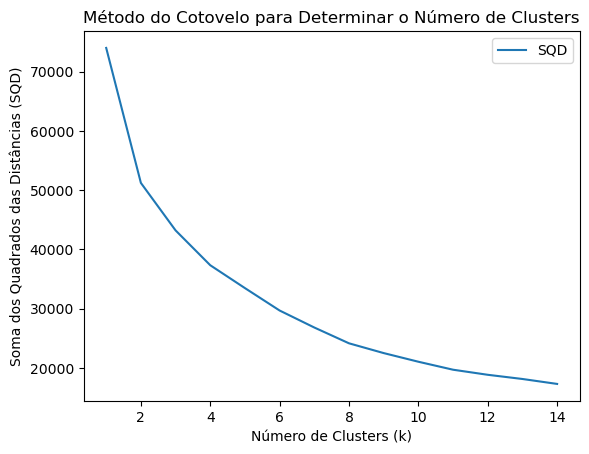

In [129]:
#Método do cotovelo

SQD = [] #lista para armazenar as somas dos quadrados das distâncias dos pontos e os centroides
K = range(1,15)

for k in tqdm(K): #loop para realizar o K-means para cada k e armazenar a SQD na lista criada 
    km = KMeans(n_clusters=k) 
    km = km.fit(df_pad[cols]) 
    SQD.append(km.inertia_)
    
df_km = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD}) #tranforma dados em dataframe

df_km.plot(x='num_clusters', y='SQD') #plota o dataframe
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Quadrados das Distâncias (SQD)')
plt.title('Método do Cotovelo para Determinar o Número de Clusters')

  0%|          | 0/9 [00:00<?, ?it/s]

/Users/rayssaathayde/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rayssaathayde/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rayssaathayde/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rayssaathayde/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

<Axes: xlabel='n_clusters'>

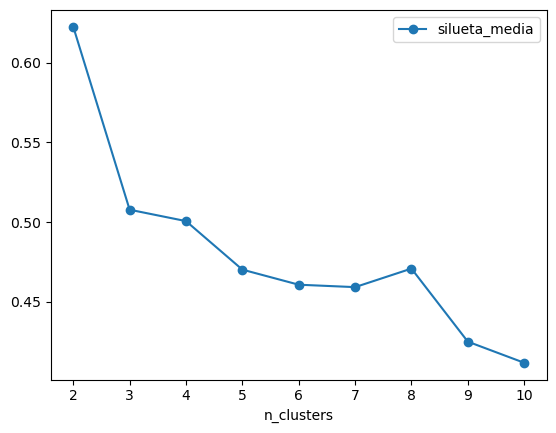

In [130]:
#Método da silueta 

siluetas = [] #lista para armazenar siluetas
max_clusters = 10

for n_clusters in tqdm(range(2, max_clusters+1)):
    km = KMeans(n_clusters=n_clusters).fit(df_pad[cols]) #executa K-means
    siluetas.append(silhouette_score(df_pad[cols], km.labels_)) #calcula coeficiente da silueta e adiciona na lista criada
    
    nomes_grupos = ['grupo'+str(n) for n in range(n_clusters)] #cria nomes para os grupos identificados pelo K-Means
    df_pad['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(km.labels_, categories=nomes_grupos) #adiciona uma nova coluna a df_pad com os rótulos dos grupos
    
df_silueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silueta_media': siluetas}) #tranforma dados em um dataframe
df_silueta.plot.line(x='n_clusters', y='silueta_media', marker= 'o') #plota o dataframe



- De acordo com o Método do Cotovelo o número de clusters seria entre 2 e 4. 
- De acordo com o Método da Silueta o número de clusters ideal seria 2. 

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

### Dois agrupamentos

Text(0.5, 1.0, 'Quantidade de clientes por cluster')

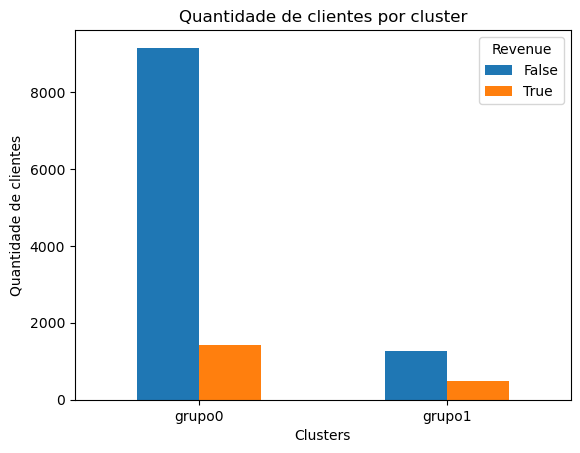

In [131]:
#cria gráfico com dataframe agrupado pelo grupos_2 (dois agrupamentos) e Revenue (indica se houve compra ou não)
#faz contagem do Revenue para saber quantos clientes compraram e quantos não
ax = df_pad.groupby(['grupos_2', 'Revenue'])['Revenue'].count().unstack().plot.bar(rot=0)

ax.set_ylabel('Quantidade de clientes')
ax.set_xlabel('Clusters')
plt.title('Quantidade de clientes por cluster')

In [132]:
#transforma variável booleana em string 
df_pad['Revenue1'] = df_pad['Revenue'].astype(str)
df_pad

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Revenue1,grupos_2,grupos_3,grupos_4,grupos_5,grupos_6,grupos_7,grupos_8,grupos_9,grupos_10
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,0.200000,0.200000,0.000000,0.0,...,False,grupo0,grupo1,grupo0,grupo1,grupo1,grupo3,grupo1,grupo1,grupo0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,0.000000,0.100000,0.000000,0.0,...,False,grupo0,grupo1,grupo0,grupo1,grupo1,grupo3,grupo1,grupo1,grupo0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,0.200000,0.200000,0.000000,0.0,...,False,grupo0,grupo1,grupo0,grupo1,grupo1,grupo3,grupo1,grupo1,grupo0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.050000,0.140000,0.000000,0.0,...,False,grupo0,grupo1,grupo0,grupo1,grupo1,grupo3,grupo1,grupo1,grupo0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,0.020000,0.050000,0.000000,0.0,...,False,grupo0,grupo1,grupo0,grupo1,grupo1,grupo3,grupo1,grupo1,grupo0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,0.007143,0.029031,12.241717,0.0,...,False,grupo0,grupo1,grupo0,grupo4,grupo5,grupo6,grupo5,grupo4,grupo8
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,0.000000,0.021333,0.000000,0.0,...,False,grupo0,grupo1,grupo0,grupo1,grupo1,grupo3,grupo1,grupo1,grupo0
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,0.083333,0.086667,0.000000,0.0,...,False,grupo0,grupo1,grupo0,grupo1,grupo1,grupo3,grupo1,grupo1,grupo0
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,0.000000,0.021053,0.000000,0.0,...,False,grupo0,grupo1,grupo0,grupo1,grupo1,grupo6,grupo1,grupo4,grupo8


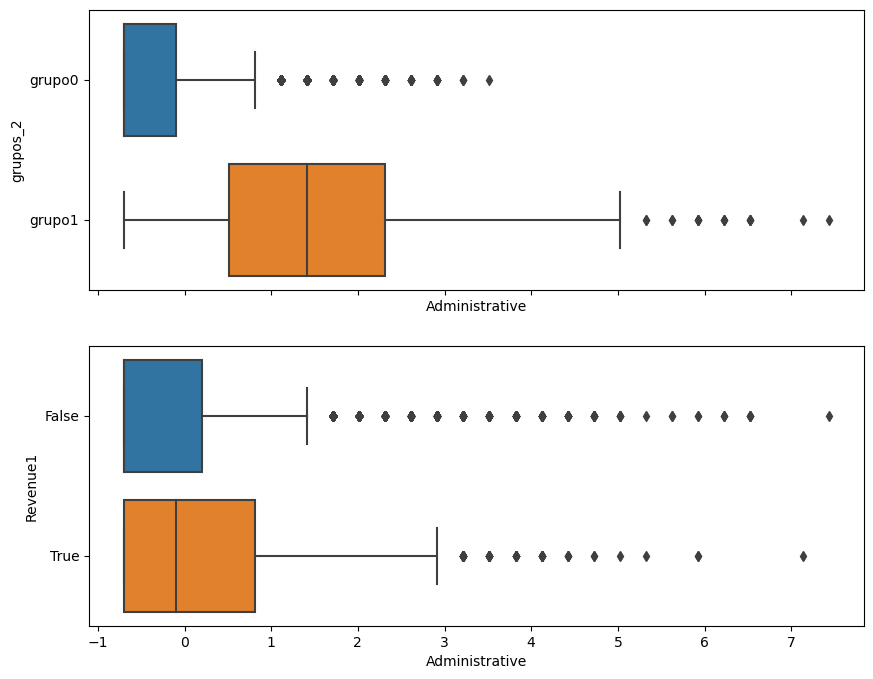

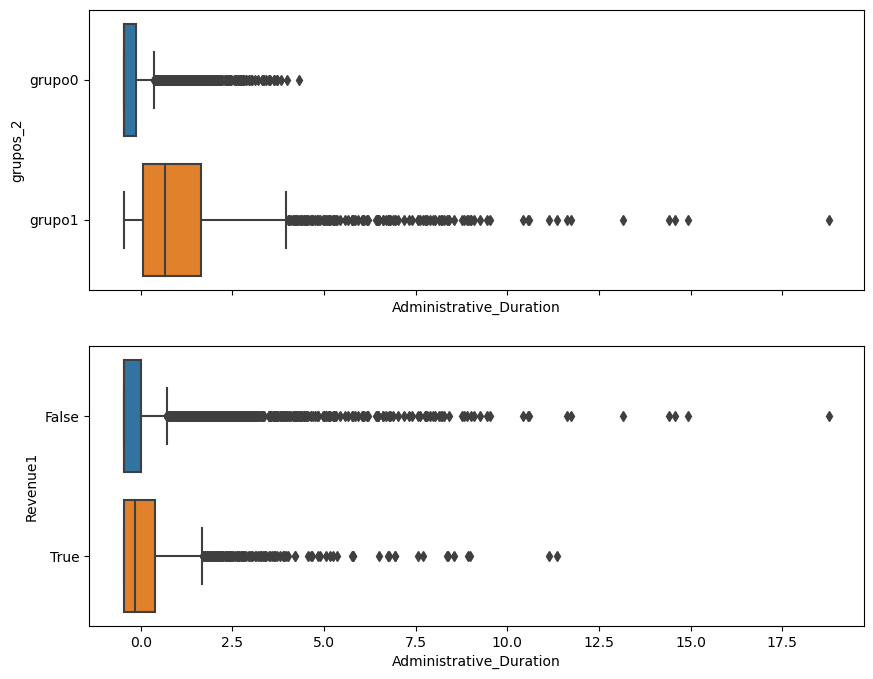

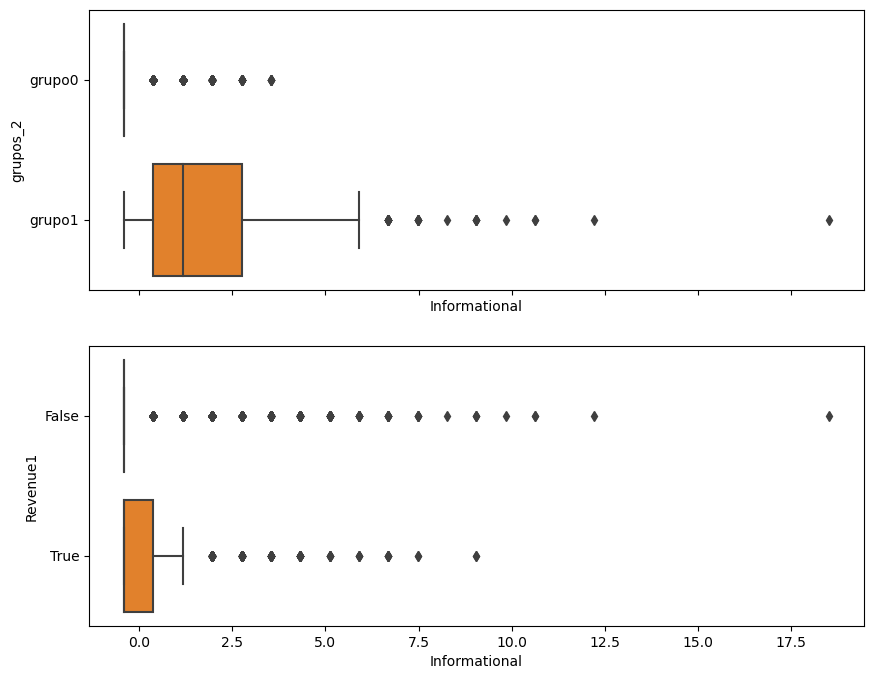

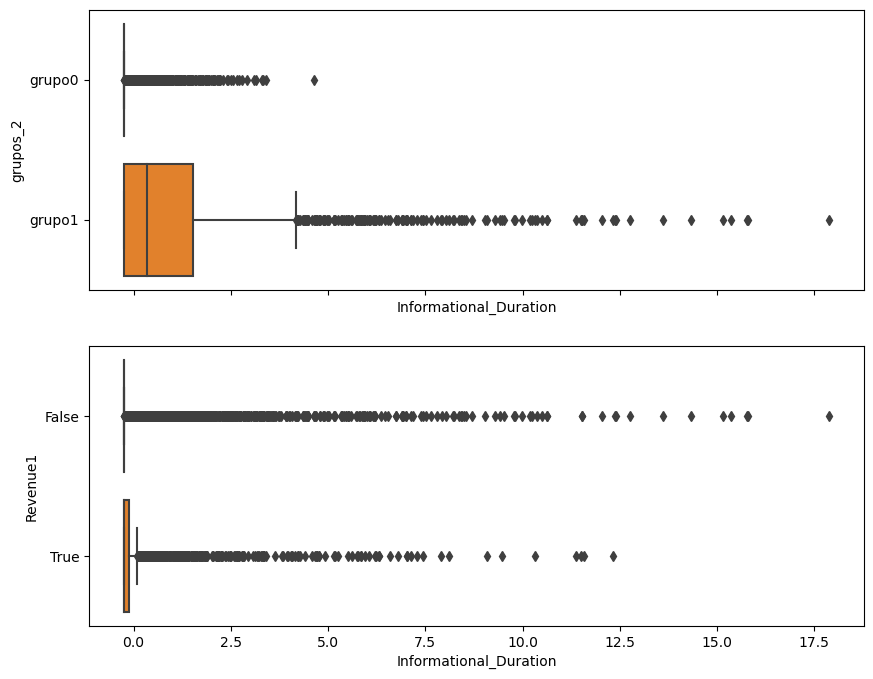

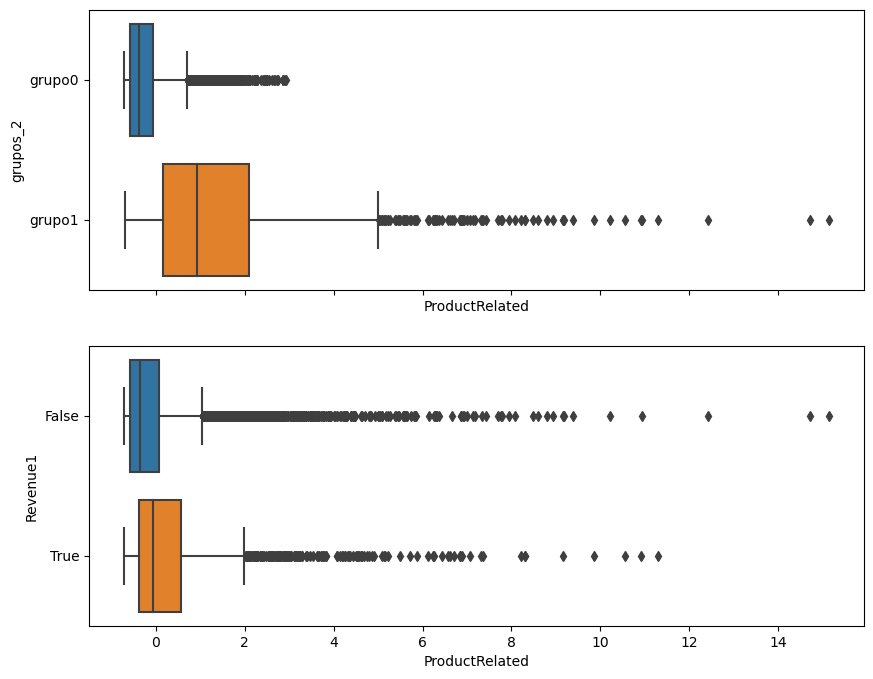

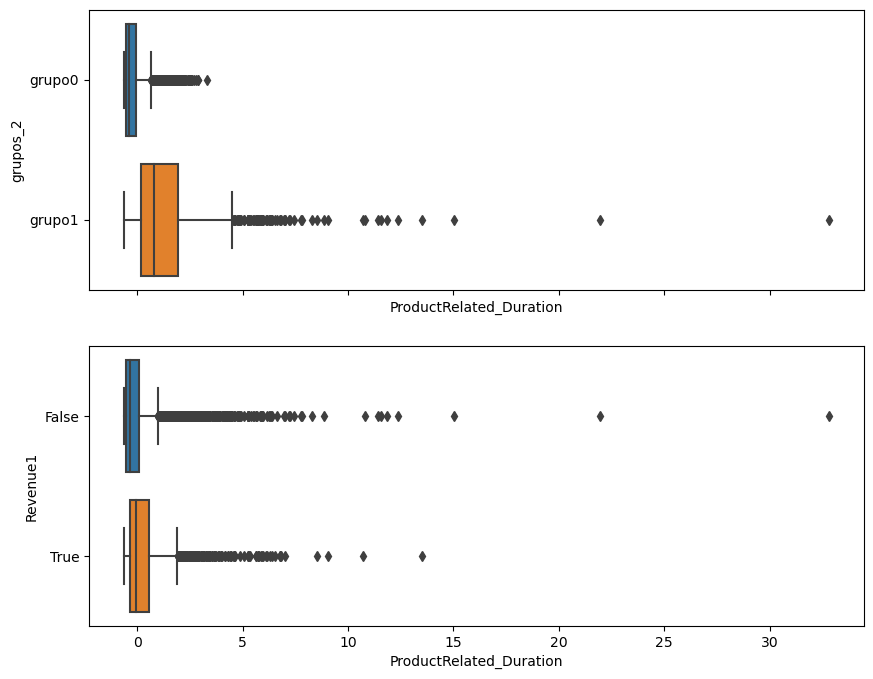

In [133]:
#função para visualizar a relação da variável com os agrupamentos formados e com Revenue 
def dataviz_grupos(varx, varg):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

    sns.boxplot(data=df_pad, y=varg, x=varx, ax=ax[0])
    sns.boxplot(data=df_pad, y='Revenue1', x=varx, ax=ax[1])
    plt.show()

#loop para aplicar a função acima em cada variável
for col in cols:
    dataviz_grupos(col, 'grupos_2')

- Quando observamos os gráficos que mostram a divisão dos grupos, parece haver sim diferença entre eles, separação entres os grupos. Contudo, quando observamos o gráfico com a variável `Revenue` (que indica se houve compra ou não) não há consistência com a separação de grupos e nem diferença relevante entre `True` e `False`.
- Essa informação está de acordo com o *pairplot* inicial, que não mostra agrupamentos aparentes.
- Não parece haver diferenças relevantes entre os clientes que compraram e os que não compraram.

/Users/rayssaathayde/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


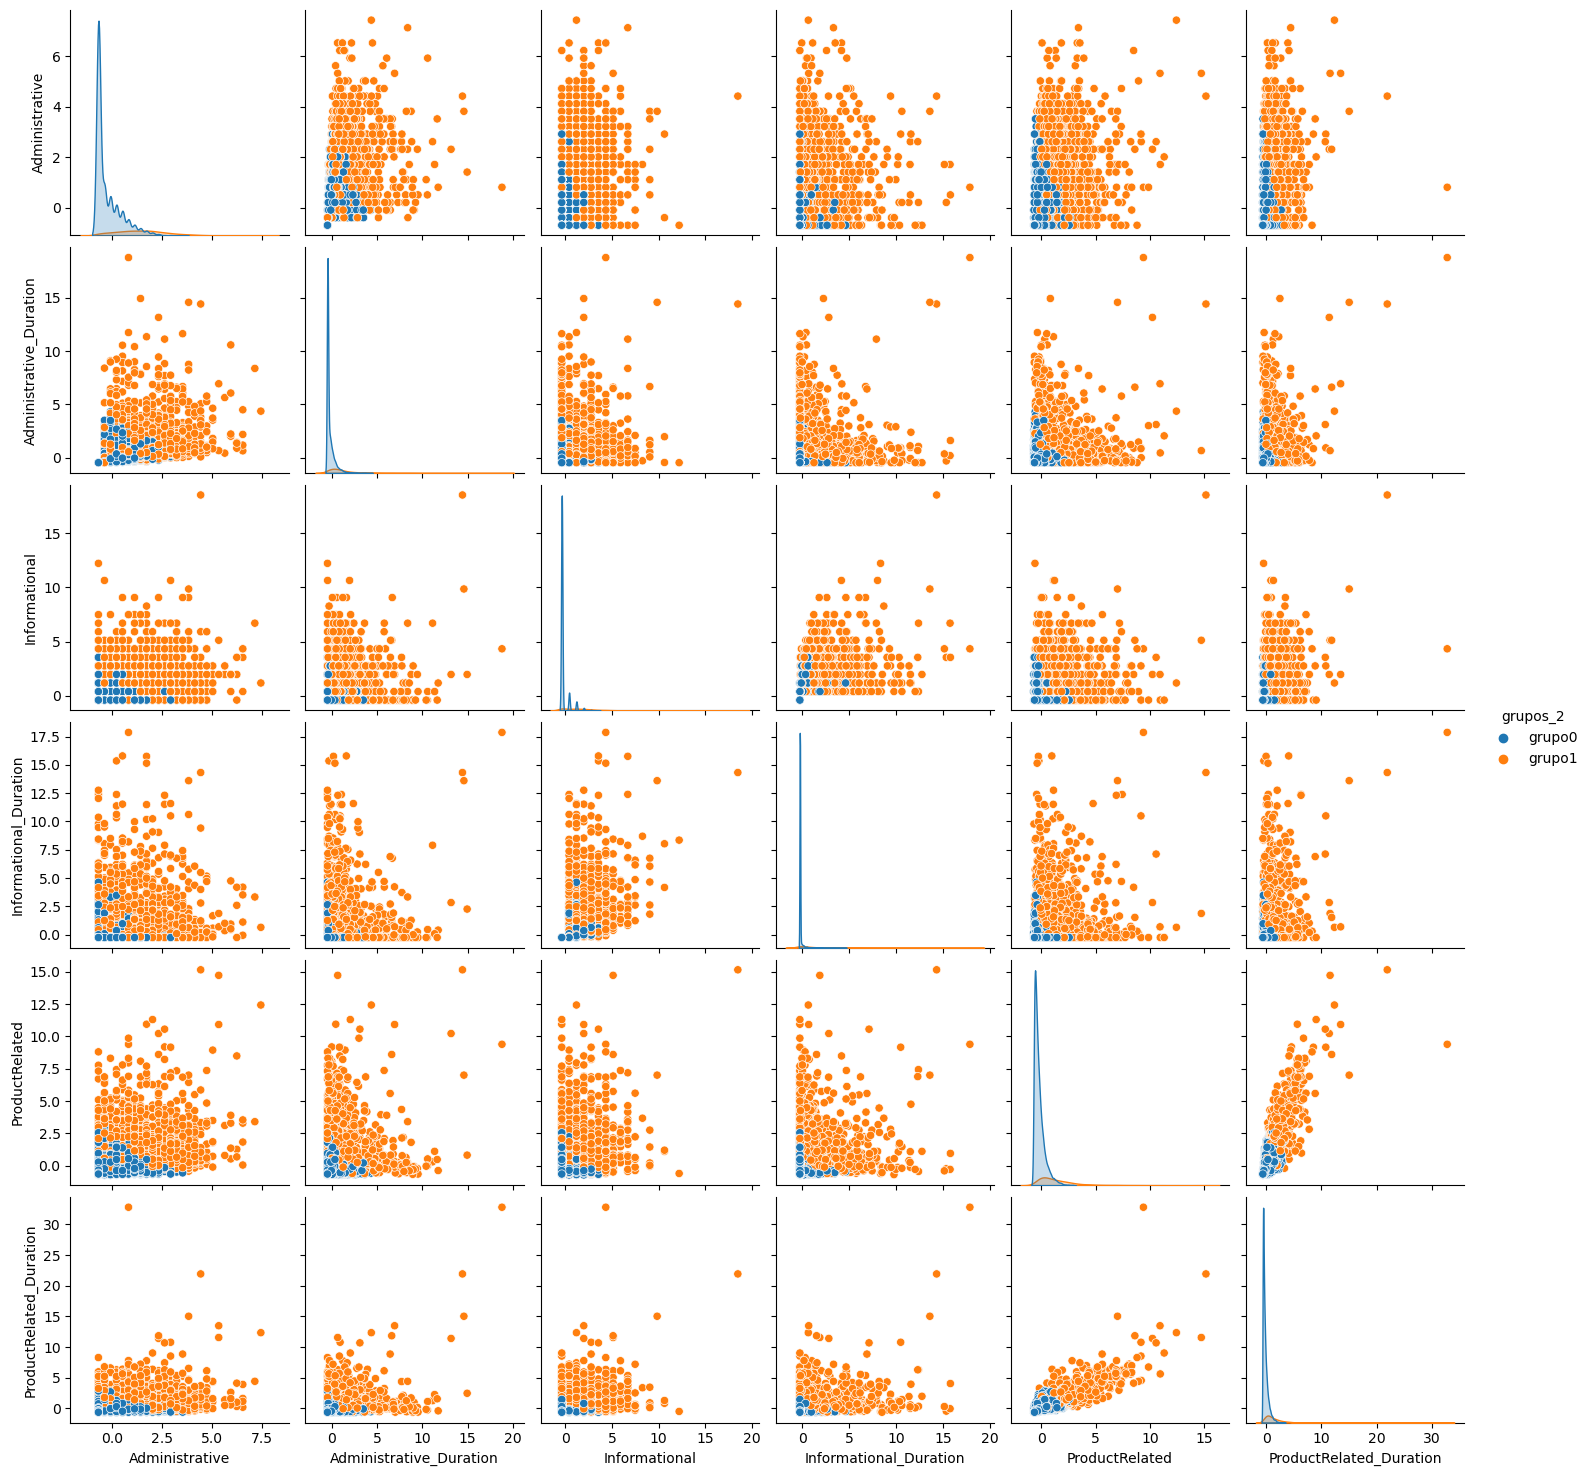

In [95]:
#paitplot para comparar relação entre as variáveis mostrando a separação em dois grupos

n_clusters = 2
var_grupo = 'grupos_' + str(n_clusters)
sns.pairplot(df_pad[cols + [var_grupo]], hue=var_grupo)

> Assim como os demais *pairplots*, não há agrupamentos distintos e a separação por grupo não é ideal.

### Três agrupamentos

Text(0.5, 1.0, 'Quantidade de clientes por cluster')

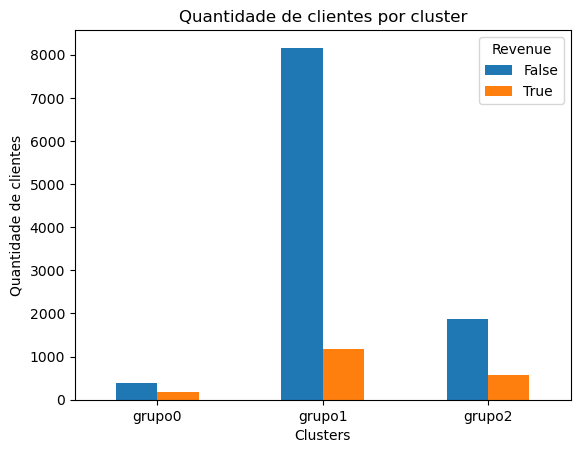

In [134]:
#cria gráfico com dataframe agrupado pelo grupos_3 (três agrupamentos) e Revenue (indica se houve compra ou não)
#faz contagem do Revenue para saber quantos clientes compraram e quantos não
ax = df_pad.groupby(['grupos_3', 'Revenue'])['Revenue'].count().unstack().plot.bar(rot=0)

ax.set_ylabel('Quantidade de clientes')
ax.set_xlabel('Clusters')
plt.title('Quantidade de clientes por cluster')

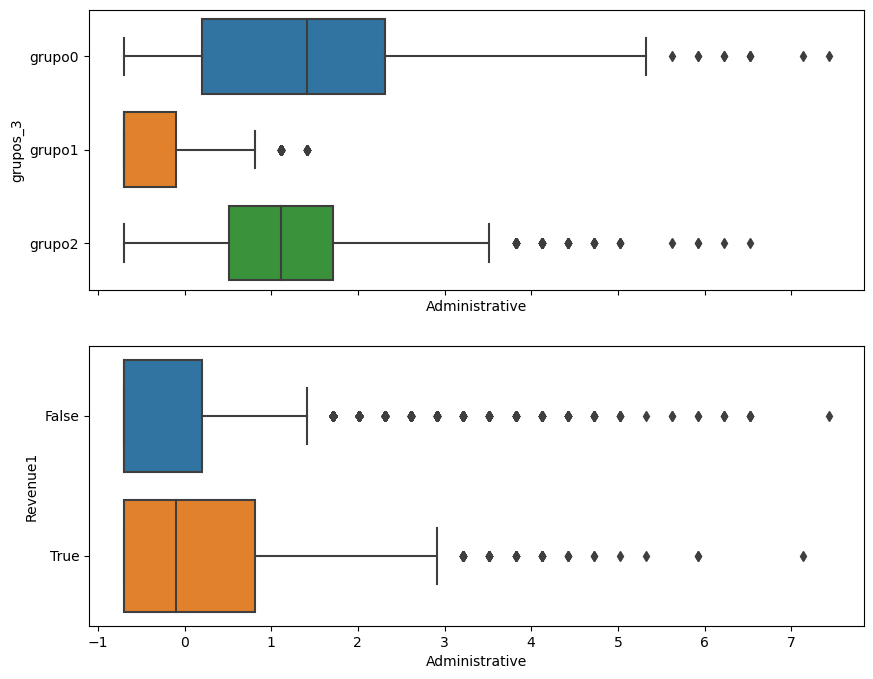

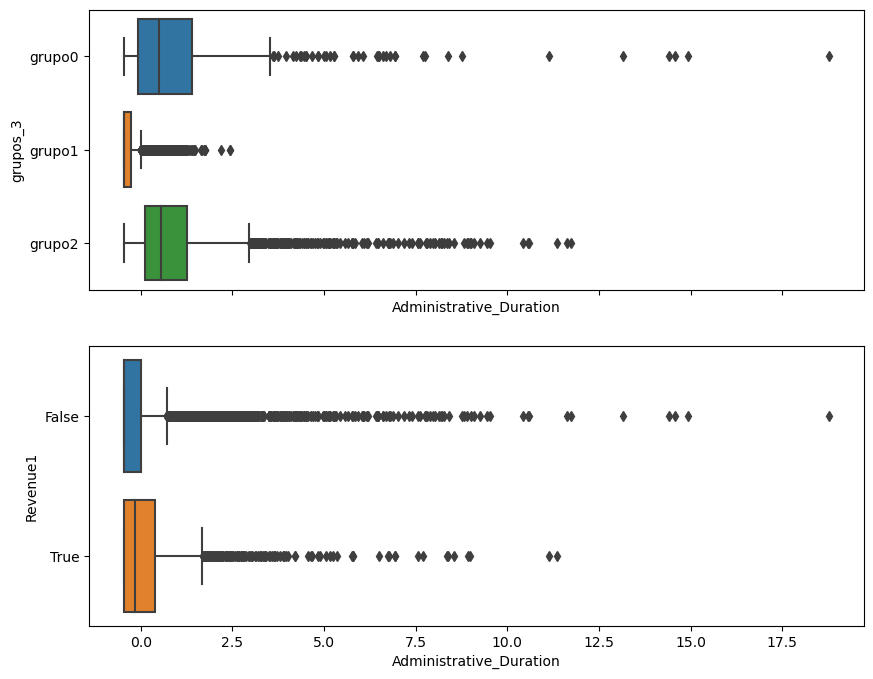

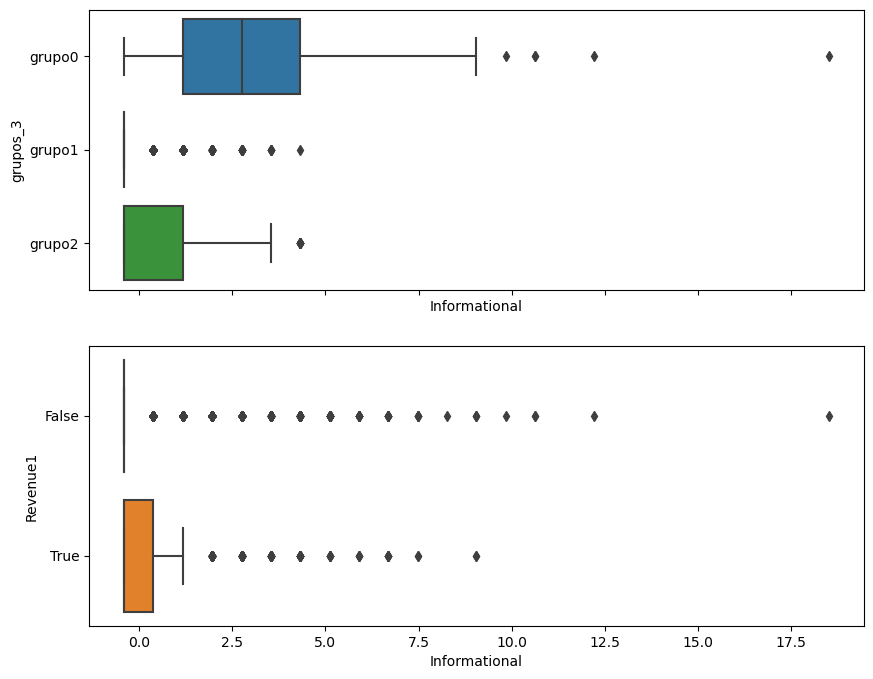

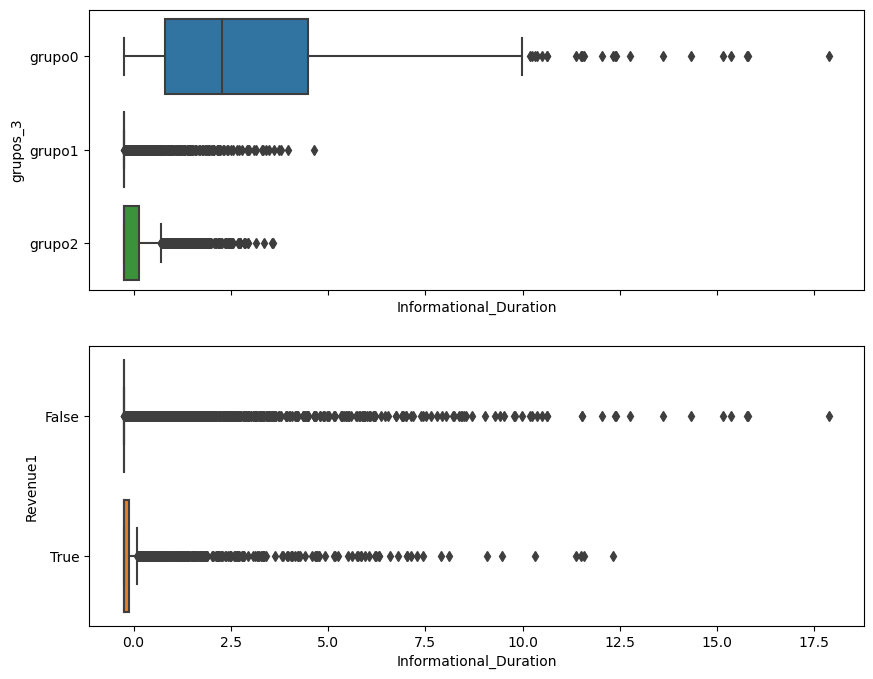

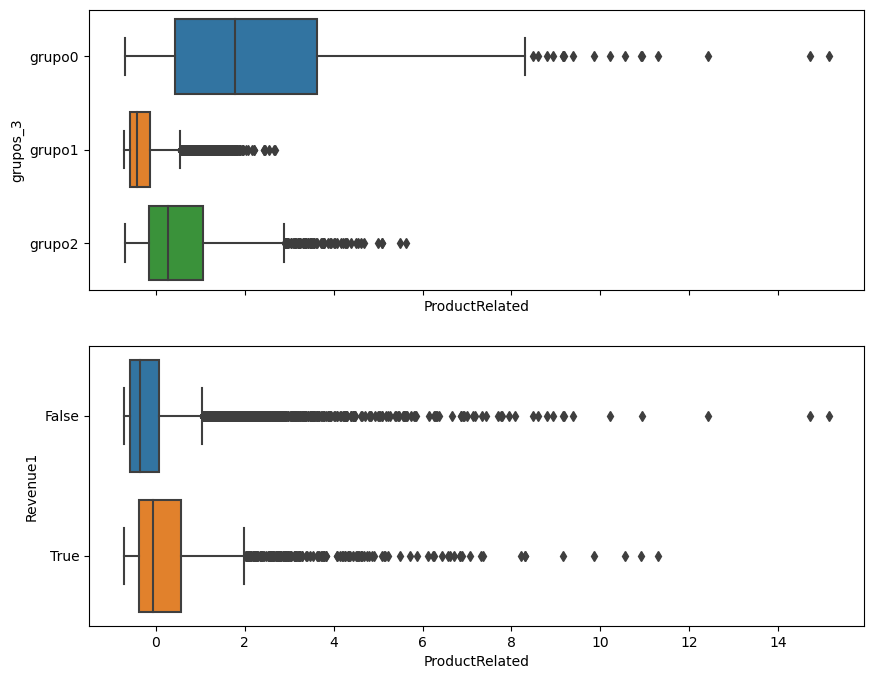

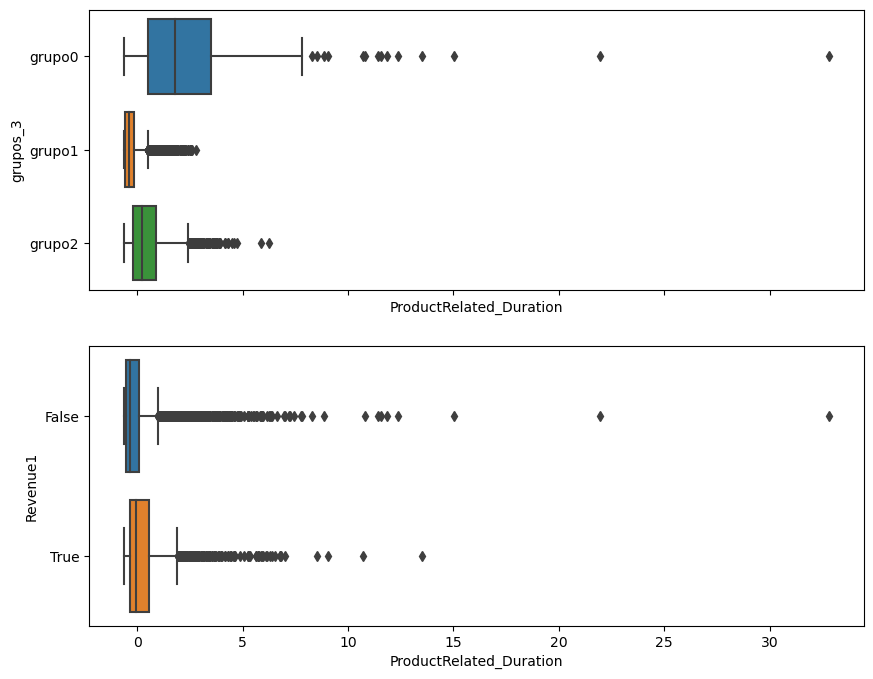

In [135]:
#loop para aplicar a função em cada variável, agora com 3 agrupamentos
for col in cols:
    dataviz_grupos(col, 'grupos_3')

- Nas variáveis `Administrative` e `Administrative_Duration` o grupo 1 parece ser diferente dos grupos 0 e 2.
- Nas demais variáveis o grupo 0 parece se diferenciar mais. 

/Users/rayssaathayde/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


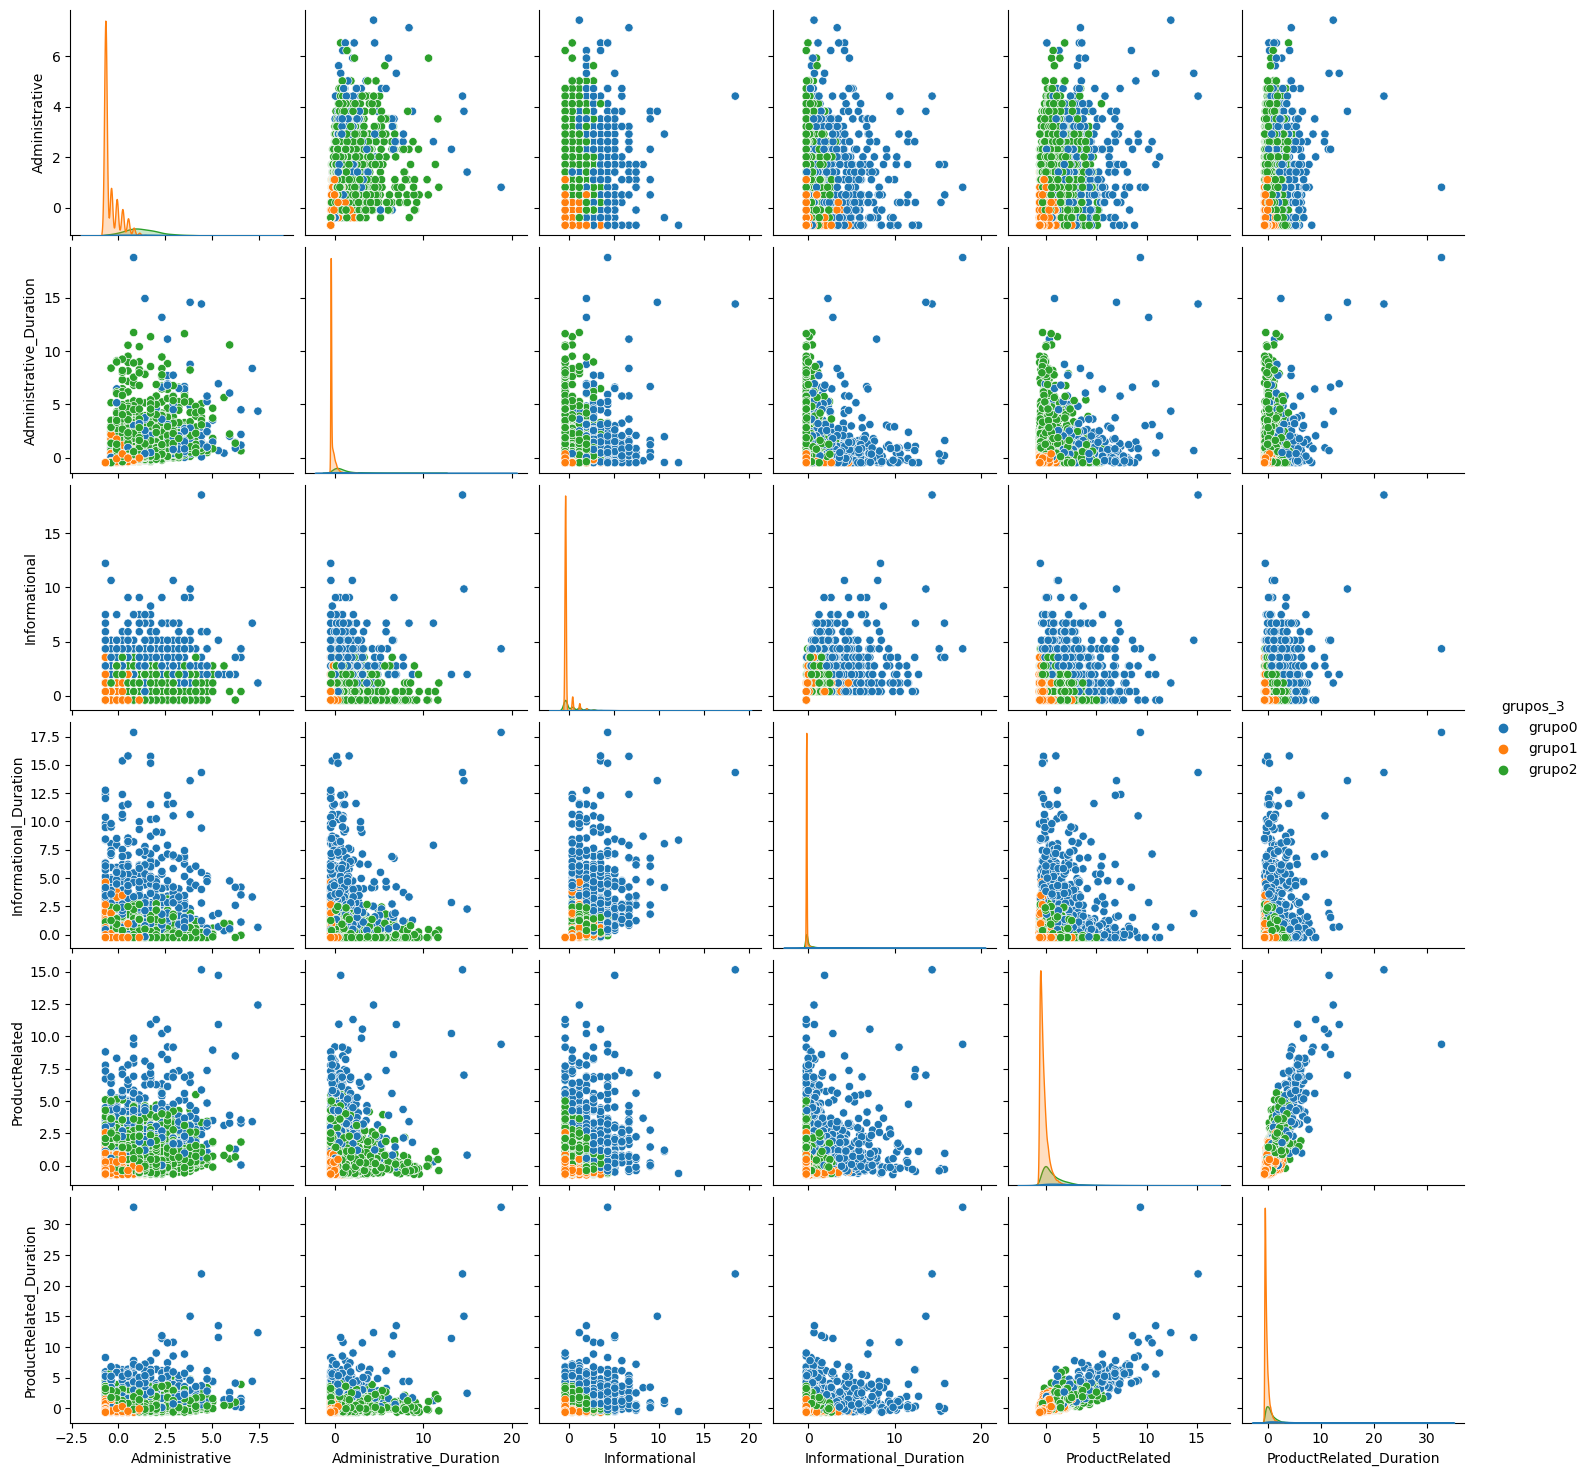

In [106]:
#paitplot para comparar relação entre as variáveis mostrando a separação em três grupos

n_clusters = 3
var_grupo = 'grupos_' + str(n_clusters)
sns.pairplot(df_pad[cols + [var_grupo]], hue=var_grupo)

> Também não parece mostrar separação distinta entre grupos.

- As duas situações (dois ou três grupos) parecem ter problemas e não separam idealmente os clientes. Contudo, eu escolheria dois agrupamentos e os separaria em **"Não interessados"** e **"Possíveis compradores"**.
- Na base há muito mais clientes que não compraram do que clientes que compraram, o que reflete nos resultados. Mesmo o grupo que seria de compradores (grupo1) ainda apresenta maior número de não interessados, o que não é ideal, por isso escolhi o nome "Possíveis compradores" e não "Compradores".  

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [127]:
df_pad.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Revenue1
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,False
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,False
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,False
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,False
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,False


In [148]:
#criar categorias para BounceRates, que é uma variável contínua
df_pad['BounceRates_cat'] = pd.qcut(df_pad['BounceRates'], 
                                    q = 4, 
                                    duplicates = 'drop') 
df_pad

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,grupos_2,grupos_3,grupos_4,grupos_5,grupos_6,grupos_7,grupos_8,grupos_9,grupos_10,BounceRates_cat
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,0.200000,0.200000,0.000000,0.0,...,grupo0,grupo1,grupo0,grupo1,grupo1,grupo3,grupo1,grupo1,grupo0,"(0.0168, 0.2]"
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,0.000000,0.100000,0.000000,0.0,...,grupo0,grupo1,grupo0,grupo1,grupo1,grupo3,grupo1,grupo1,grupo0,"(-0.001, 0.00311]"
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,0.200000,0.200000,0.000000,0.0,...,grupo0,grupo1,grupo0,grupo1,grupo1,grupo3,grupo1,grupo1,grupo0,"(0.0168, 0.2]"
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.050000,0.140000,0.000000,0.0,...,grupo0,grupo1,grupo0,grupo1,grupo1,grupo3,grupo1,grupo1,grupo0,"(0.0168, 0.2]"
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,0.020000,0.050000,0.000000,0.0,...,grupo0,grupo1,grupo0,grupo1,grupo1,grupo3,grupo1,grupo1,grupo0,"(0.0168, 0.2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,0.007143,0.029031,12.241717,0.0,...,grupo0,grupo1,grupo0,grupo4,grupo5,grupo6,grupo5,grupo4,grupo8,"(0.00311, 0.0168]"
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,0.000000,0.021333,0.000000,0.0,...,grupo0,grupo1,grupo0,grupo1,grupo1,grupo3,grupo1,grupo1,grupo0,"(-0.001, 0.00311]"
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,0.083333,0.086667,0.000000,0.0,...,grupo0,grupo1,grupo0,grupo1,grupo1,grupo3,grupo1,grupo1,grupo0,"(0.0168, 0.2]"
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,0.000000,0.021053,0.000000,0.0,...,grupo0,grupo1,grupo0,grupo1,grupo1,grupo6,grupo1,grupo4,grupo8,"(-0.001, 0.00311]"


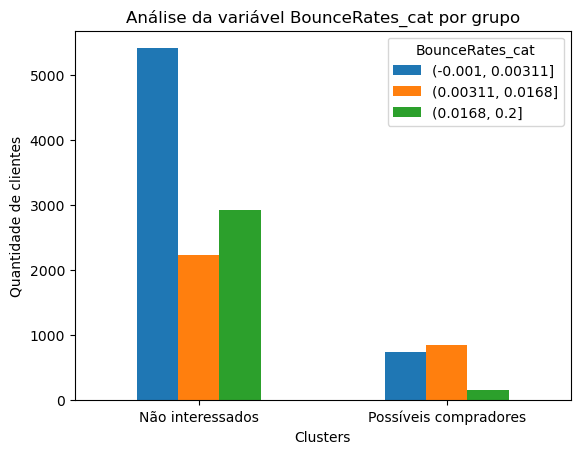

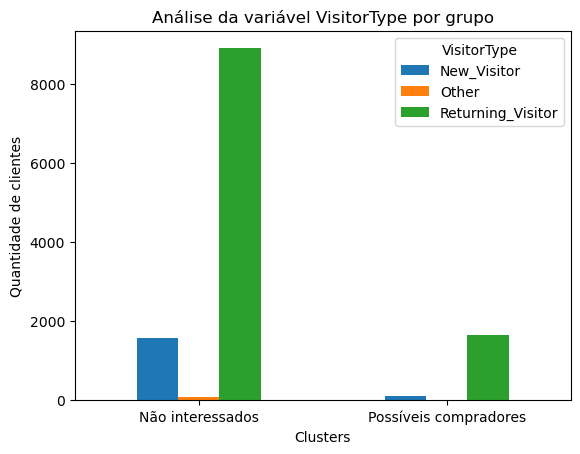

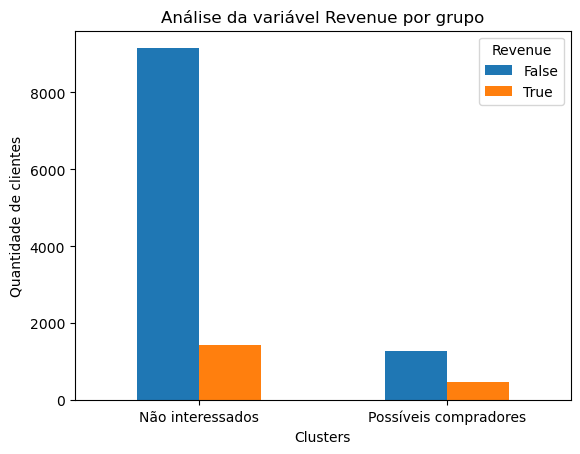

In [146]:
#cria gráfico com dataframe agrupado pelo grupos_2 (dois agrupamentos) e variáveis fora do escopo

cols_n_escp = ['BounceRates_cat', 'VisitorType', 'Revenue'] #lista com variáveis fora do escopo

for coln in cols_n_escp:
    ax = df_pad.groupby(['grupos_2', coln])[coln].count().unstack().plot.bar(rot=0)
    
    ax.set_ylabel('Quantidade de clientes')
    ax.set_xticklabels(['Não interessados', 'Possíveis compradores'])
    ax.set_xlabel('Clusters')
    plt.title(f'Análise da variável {coln} por grupo')

> O modelo acertou ao classificar a maioria dos clientes que não realizaram compras no grupo **Não interessados**, porém parece não conseguir identificar os clientes que realizaram compras.